# Food Delivery App Customers Analysis: GrabSpark 2022 Case Competition
    Data-driven business case competition
---
##### <u><b>Objective</b> : To find meaningful insights from given datasets and to indicate problems from the data.</u><br>

*by Patcharanat P.*<br>

**Dataset : Given by Grab company**<br>

attributes - providing attibutes of the data
* 'sample_a.csv'<br>

metrics - providing metrics of the data
* 'sample_m.csv'<br>

### Background
Grab, one of the biggest company in food delivery industry, created an business case competition event for the purpose of solving own company problems by giving candidates sample datasets which is already normalized to prevent data oversharing to find insights and problems from it, and also giving 'case booklet' for the current contexts and further details of the company. So, objective of this project are analyzing given datasets and pointing out what should be concern for developing further business and markeing strategy.

### Table of contents
* Import Library
* Data Preparing
* Data Understanding
* Exploratory Data Analysis
    * Understanding Relationship between tables before Analysis
    * For Analysis
* Insights Summary and Interpretation
* Actions for Business and Marketing use cases
* KPIs
* Epilogue

---

### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('dark')

---

### Data Preparing

In [2]:
df_a = pd.read_csv('sample_a.csv')
df_m = pd.read_csv('sample_m.csv')

# the column is not useful.
df_a.drop(columns=['predicted age 10year'], inplace=True)

# additional column
df_m['sum_promo'] = df_m['grabfood_promo'] + df_m['grabmart_promo'] + df_m['transport_promo'] + df_m['grabexpress_promo']

# Extract only month for 'month' column and replace
df_m['month'] = df_m['month'].str.split('-')
for index, row in df_m.iterrows() :
    df_m['month'][index] = row['month'][1]
df_m['month']

C:\Users\HP\AppData\Local\Temp\ipykernel_38384\3073271058.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['month'][index] = row['month'][1]


0        Apr
1        May
2        Jun
3        Apr
4        May
        ... 
15933    Jun
15934    May
15935    May
15936    May
15937    May
Name: month, Length: 15938, dtype: object

In [3]:
df_a.head()

,passenger_id,city,operating_system,GU subscription month,first vertical,predicted gender
0,6MU770IJ316,B,Android,NaN,Transport,Male
1,1LK210OW862,A,Android,NaN,GrabFood,Male
2,2GO467RR778,D,Android,NaN,GrabFood,Female
3,8YN162JM713,F,Android,NaN,GrabFood,Male
4,3VV906PF234,F,Android,Feb-22,GrabFood,Male


In [4]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20122 entries, 0 to 20121
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   passenger_id           20122 non-null  object
 1   city                   20122 non-null  object
 2   operating_system       20122 non-null  object
 3   GU subscription month  497 non-null    object
 4   first vertical         20122 non-null  object
 5   predicted gender       20044 non-null  object
dtypes: object(6)
memory usage: 943.3+ KB


In [5]:
df_m.head()

,passenger_id,month,gmv,tpv,booking,cashless_bookings,grabfood_gmv,grabfood_tpv,grabfood_booking,grabfood_promo,...,transport_promo,grabexpress_gmv,grabexpress_tpv,grabexpress_booking,grabexpress_promo,earned_point_l30d,burned_point_l30d,eom_point_balance,eom_reward_tier,sum_promo
0,6DY932XX001,Apr,228.87,228.87,22,22,190.20,190.20,18,75.00,...,9.85,0.0,0.0,0,0.0,20,20,20,platinum,84.85
1,6DY932XX001,May,361.69,361.69,20,20,195.15,195.15,15,85.00,...,2.15,0.0,0.0,0,0.0,60,80,20,platinum,88.72
2,6DY932XX001,Jun,537.62,537.62,49,49,383.45,383.45,43,122.25,...,3.13,0.0,0.0,0,0.0,60,60,20,platinum,143.17
3,7TI041UN191,Apr,45.15,45.15,2,2,45.15,45.15,2,2.50,...,0.00,0.0,0.0,0,0.0,20,0,40,gold,2.50
4,7TI041UN191,May,74.70,74.70,7,7,74.70,74.70,7,6.25,...,0.00,0.0,0.0,0,0.0,20,40,20,gold,6.25


In [6]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15938 entries, 0 to 15937
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   passenger_id         15938 non-null  object 
 1   month                15938 non-null  object 
 2   gmv                  15938 non-null  float64
 3   tpv                  15938 non-null  float64
 4   booking              15938 non-null  int64  
 5   cashless_bookings    15938 non-null  int64  
 6   grabfood_gmv         15938 non-null  float64
 7   grabfood_tpv         15938 non-null  float64
 8   grabfood_booking     15938 non-null  int64  
 9   grabfood_promo       15938 non-null  float64
 10  grabmart_gmv         15938 non-null  float64
 11  grabmart_tpv         15938 non-null  float64
 12  grabmart_booking     15938 non-null  int64  
 13  grabmart_promo       15938 non-null  float64
 14  transport_gmv        15938 non-null  float64
 15  transport_tpv        15938 non-null 

Since the datasets are collected correctly and purposely, so the data is quite already cleaned and ready to be analyzed. 

---

### Data Understanding

Data understanding is one of the biggest processes of this work. Although Grab company gave definition for each column, It still consume a large amount of time to understand relationship between the tables, within the table, with the given context and also with the algorithm of Grab Delivery app. So, this section will give definition of important columns which is involved in data analysis process for easier explanation in further.

The data include with 2 tables:
* **sample_a - 6 columns** as 'df_a'
    * **passenger_id**: *Unique for each passenger*
    * **city: City where** *the passenger was active in (A-H)*
    * **operating_system**: *Passenger's device operating system (not available to all passengers)*
    * **GU subscription month**: *the month that the passenger started GrabUnlimited subscription*
    * **first vertical**: *The vertical service that passenger first used*
    * **predicted gender**: *Predicted gender of the passenger (not available to all passengers)*
* **sample_m - 26 columns** as 'df_m'
    * **passenger_id**: *Unique ID of the passenger*
    * **month**: *Month of the aggregated metrics*
    * **gmv**: *Gross Merchandise value - **Total spending amount** in THB excluding any discount* 
    * **tpv**: *Totol processed value (TPV) - **Total cashless spending amount** in THB excluding any discount*
    * **booking**: *Total number of booking*
    * **cashless_bookings**: *Total number of cashless booking*
    * **grabfood_gmv**: *GrabFood GMV*
    * **grabfood_tpv**: *GrabFood TPV*
    * **grabfood_booking**: *GrabFood Booking*
    * **grabfood_promo**: *Total amount of promo used in THB on GrabFood bookings<br> 
    etc. for grabmart, transport (grab transport), grabexpress*
    * **earned_point_l30d**: *Total number of GrabRewards point earned*
    * **burned_point_l3od**: *Total number of GrabRewards point burned*
    * **eom_point_balance**: *Total GrabRewards point balance at end of month*
    * **eom_reward_tier**: *Current tier for each customer for specific month*

---

### Exploratory Data Analysis

##### **Understanding Relationship between the tables before Analysis**

In [7]:
print(
    df_a['passenger_id'].shape,
    df_m['passenger_id'].shape
)

(20122,) (15938,)


In [8]:
print(
    df_a['passenger_id'].unique().shape,
    df_m['passenger_id'].unique().shape
)


(20122,) (7864,)


After inspecting number of rows, the first thing you can notice is each row in table 'df_a' containing an unique customer by unique passenger id, unlike table 'df_m', which contains transaction per user for each month for customers, so it means 'df_m' containing duplicate passenger_id. the second, number of unique customers in 'df_m' not equals to customers in 'df_a'. why is that?

> From data description, each row in 'df_m' represents aggregated metrics for each passenger in each month in Q2 2022.<br>
And if the passenger was not active in a month (having no transaction on the platform) then there will be no data.

In [9]:
df_m['month'].unique()

array(['Apr', 'May', 'Jun'], dtype=object)

So, you can assume that all customers are recorded in 'df_a', and only active users who spent money in May, April, and June are showed in 'df_m'. Hence I managed customers into 2 groups; active users, and inactive users. My intention now is to find difference of customer behavior between 2 groups, so I can create strategy which can attract inactive user to become an active users and re-purchase with Grab App again.

In [10]:
active_customer_id = df_m['passenger_id'].unique() # collect unique id of active customers
active_customer_condition = df_a['passenger_id'].isin(active_customer_id) # Boolean Series to track active customers in df_a

# seperate active customers, and inactive customers in df_a
active_customer = df_a[active_customer_condition]
inactive_customer = df_a[~active_customer_condition]

Now you can analyze customer behavior for each group in df_a.

In [11]:
active = round((df_m['passenger_id'].unique().shape[0] / df_a['passenger_id'].unique().shape[0])*100, 3)
inactive = 100 - round((df_m['passenger_id'].unique().shape[0] / df_a['passenger_id'].unique().shape[0])*100, 3)

print('Active users: ', active, ' %')
print('Inactive users: ', inactive, ' %')

Active users:  39.082  %
Inactive users:  60.918  %


Additionally, you can calculate percent of active users, and inactive users by counting unique passenger ID.

##### **For Analysis** 

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

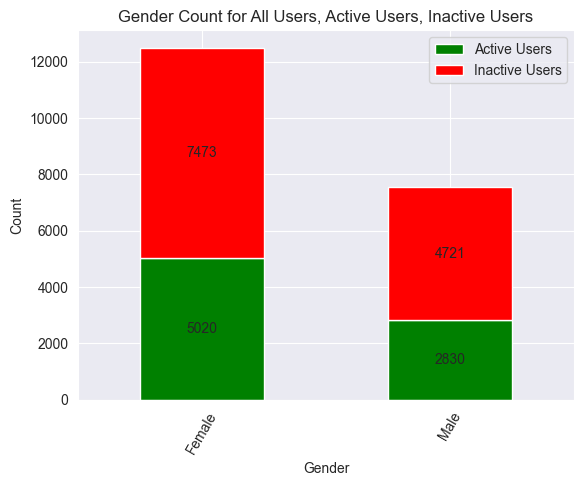

In [12]:
x = df_a['predicted gender'].value_counts().index.tolist()
y1 = active_customer['predicted gender'].value_counts().values.tolist()
y2 = inactive_customer['predicted gender'].value_counts().values.tolist()

df_temp = pd.DataFrame(data={'Active Users': y1, 'Inactive Users': y2})
df_temp.index = x

ax = df_temp.plot(kind='bar', stacked=True, xlabel='Gender', ylabel='Count', color={'Active Users': 'green','Inactive Users': 'red'})
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

# https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels

plt.grid(True)
plt.title('Gender Count for All Users, Active Users, Inactive Users')
plt.xticks(rotation=60)

In [13]:
print('Female customer active ratio: ', round(5020/7473, 3))
print('Male customer active ratio: ', round(2830/4721, 3))
print('Female customer and Male customer ratio: ', round((5020+7473)/(2830+4721), 3))

Female customer active ratio:  0.672
Male customer active ratio:  0.599
Female customer and Male customer ratio:  1.654


Text(0.5, 0, 'Gender')

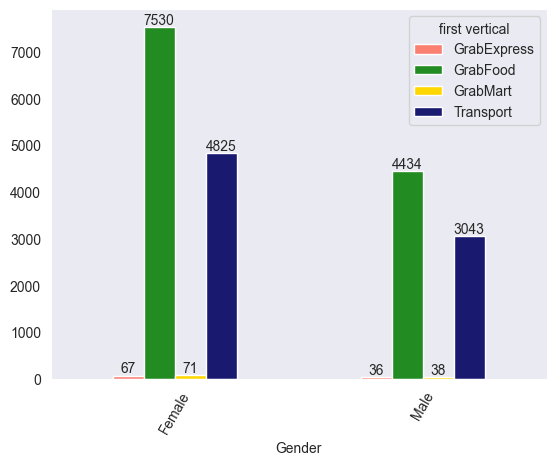

In [14]:
ax = df_a.groupby('predicted gender')['first vertical'].value_counts().unstack().plot(kind='bar', color= ['salmon', 'forestgreen', 'gold', 'midnightblue'])
for container in ax.containers :
    ax.bar_label(container)

plt.xticks(rotation=60)
plt.xlabel('Gender')

From the charts, you can see that female has more potential to be a customer than male implying that female have a larger marketshare for all services including food delivery, transportation, package express, and mart service. Moreover, female is more likely to be more loyal customer because of higher active users and inactive users ratio comparing.
And GrabFood and GrabTransport are the most attractive for new users comparing to the others.

---

**Comparing first-used services between active users, and inactive users.**

Text(0.5, 1.0, 'Active customers First-use Feature Counting')

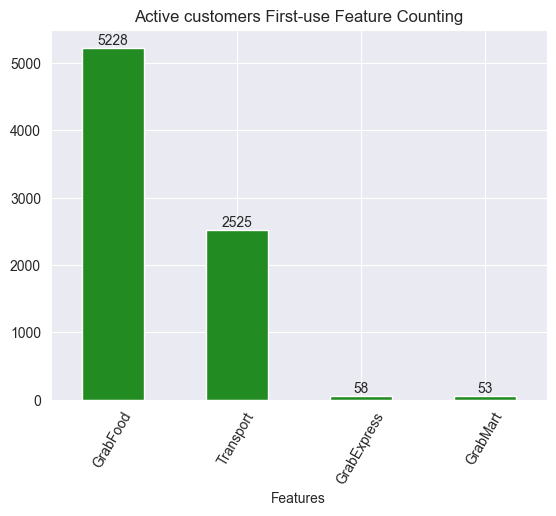

In [15]:
ax = active_customer['first vertical'].value_counts().plot(kind='bar', color='forestgreen')

ax.bar_label(ax.containers[0])
plt.xticks(rotation=60)
plt.grid(True)

plt.xlabel('Features')
plt.title('Active customers First-use Feature Counting')

Text(0.5, 1.0, 'Inactive customers First-use Feature Counting')

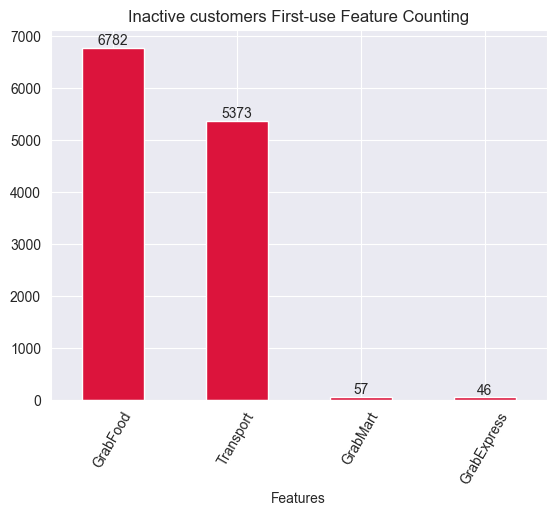

In [16]:
ax = inactive_customer['first vertical'].value_counts().plot(kind='bar', color='crimson')

ax.bar_label(ax.containers[0])
plt.xticks(rotation=60)
plt.grid(True)

plt.xlabel('Features')
plt.title('Inactive customers First-use Feature Counting')

In [17]:
print('First Service: GrabFood')
transport_user_ID = df_a.loc[df_a['first vertical'] == 'GrabFood']['passenger_id']
condition = df_m['passenger_id'].isin(transport_user_ID)
df_m[condition][['grabfood_gmv', 'grabfood_tpv', 'grabmart_gmv', 'grabmart_tpv', 'transport_gmv', 'transport_tpv', 'grabexpress_gmv', 'grabexpress_tpv']].mean()

First Service: GrabFood


grabfood_gmv       48.887829
grabfood_tpv       19.292891
grabmart_gmv        4.877232
grabmart_tpv        1.874119
transport_gmv       2.239865
transport_tpv       0.710461
grabexpress_gmv     1.850848
grabexpress_tpv     0.520431
dtype: float64

In [18]:
print('First Service: Transport')
grabfood_user_ID = df_a.loc[df_a['first vertical'] == 'Transport']['passenger_id']
condition = df_m['passenger_id'].isin(grabfood_user_ID)
df_m[condition][['grabfood_gmv', 'grabfood_tpv', 'grabmart_gmv', 'grabmart_tpv', 'transport_gmv', 'transport_tpv', 'grabexpress_gmv', 'grabexpress_tpv']].mean()

First Service: Transport


grabfood_gmv       61.094038
grabfood_tpv       40.110053
grabmart_gmv        6.330161
grabmart_tpv        3.803649
transport_gmv       8.337419
transport_tpv       3.878391
grabexpress_gmv     5.400791
grabexpress_tpv     2.378652
dtype: float64

For inactive users, you definitely can't find any customer behavior insight because Grab didn't provide enough data to analyze, so you have to focus on active users instead, but one thing that can be obviously noticed is a lots of customer who used GrabTransport as first-service having potential enough to be a customer, but failing to re-purchase. Besides, the customers have spent for GrabFood even more than customers who use GrabFood as a first service.

In [19]:
df_a.loc[df_a['first vertical'] == 'GrabFood']['city'].value_counts()

A    2832
G    2329
C    2054
D    1946
B    1206
E     682
F     667
H     294
Name: city, dtype: int64

In [20]:
df_a.loc[df_a['first vertical'] == 'Transport']['city'].value_counts()

A    4950
C    1044
D     803
G     473
B     418
E     113
F      85
H      12
Name: city, dtype: int64

For customers who're still active, After checking spending behavior of GrabFood first-used customer, and GrabTransport first-used customer, you can surprisingly see that GrabTransport first-used customer averagely spent more than the other group. So my assumption is most of GrabTransport first-used customer lived in city A which may be a capital, so people quite have potential to spend money and demand for transportation service, because of this, it causes a large marketshare, have more chance of willing to use other service of Grab besides GrabFood and GrabTransport, mostly spent by **TPV** assuming that this group of customer should be highly demanded by Grab company, which will has supported insights later in this notebook. Moreover, Maybe if Grab can make this customer group (who used GrabTransport as a first service) re-active again, Grab will earn a large amount of spending from GrabFood by this group of customers.

The most importances which will be referred later are GrabTransport first-used users mostly spent money as TPV; spent by cashless method comparing to the other group. And inactive users who use GrabTransport as a first service have potential to be a GrabTransport customer, but decide not to purchase with Grab and maybe use competitior's service or public transport instead.

---

**Comparing first-used services between cities.**

Text(0.5, 1.0, 'Comparing First Vertical each City (Inactive Customers)')

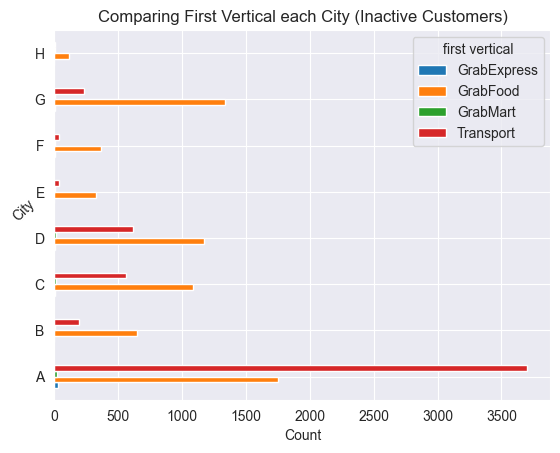

In [21]:
inactive_customer.groupby('first vertical')['city'].value_counts().unstack(0).plot(kind='barh')

plt.grid(True)

plt.xlabel('Count')
plt.ylabel('City', rotation=45)
plt.title('Comparing First Vertical each City (Inactive Customers)')

Text(0.5, 1.0, 'Comparing First Vertical each City (Active Customers)')

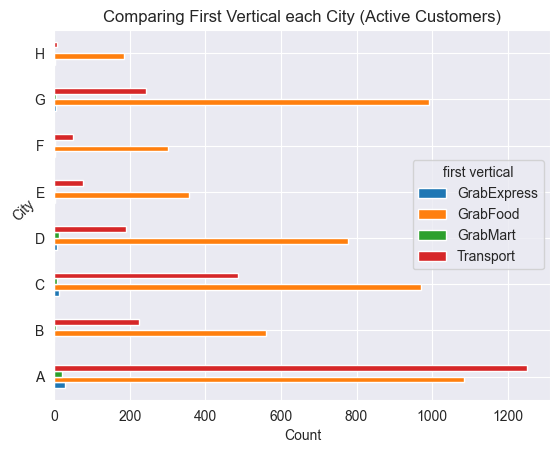

In [22]:
active_customer.groupby('first vertical')['city'].value_counts().unstack(0).plot(kind='barh')

plt.grid(True)

plt.xlabel('Count')
plt.ylabel('City', rotation=45)
plt.title('Comparing First Vertical each City (Active Customers)')

Text(0.5, 1.0, 'Comparing First Vertical each City (All)')

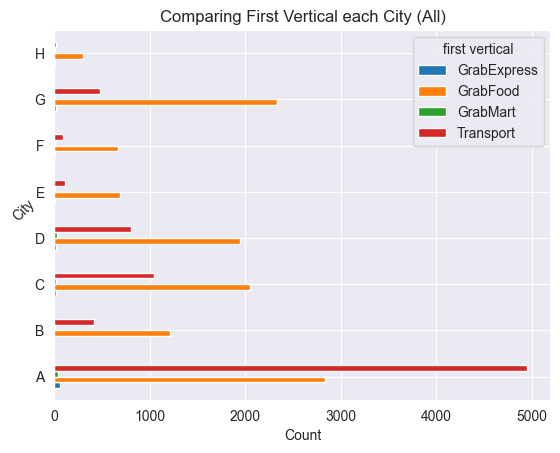

In [23]:
df_a.groupby('first vertical')['city'].value_counts().unstack(0).plot(kind='barh')

plt.grid(True)

plt.xlabel('Count')
plt.ylabel('City', rotation=45)
plt.title('Comparing First Vertical each City (All)')

Proving that city A literally has a larger marketshare for GrabTransport but not occupied by Grab company.

---

**About GU (GrabUnlimited) subscription**

In [24]:
print('Total GU Users: ', df_a['GU subscription month'].notnull().sum())
print('Active Users who have GU Subscription: ', active_customer['GU subscription month'].notnull().sum())
print('Inactive Users who have GU Subscription: ', inactive_customer['GU subscription month'].notnull().sum())
print('Active rate of GU subscribers: ', round(active_customer['GU subscription month'].notnull().sum() / df_a['GU subscription month'].notnull().sum(), 4)*100, '%')

Total GU Users:  497
Active Users who have GU Subscription:  488
Inactive Users who have GU Subscription:  9
Active rate of GU subscribers:  98.19 %


<AxesSubplot:>

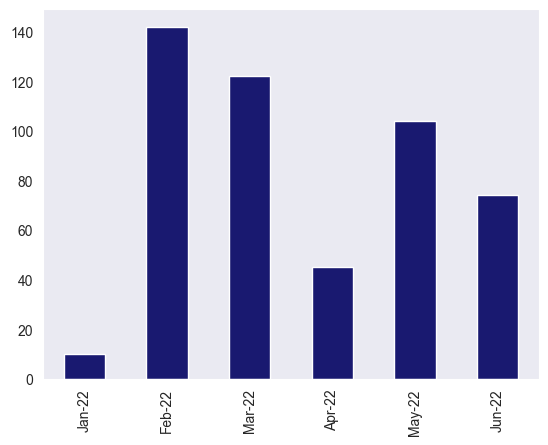

In [25]:
df_a['GU subscription month'].value_counts().reindex(['Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22']).plot(kind='bar', color='midnightblue')

Doesn't matter which month customers started the subscription, almost entire of GU Customers still active on Grab App. And somehow, GU subscription got attention increased significantly during Feb, and May. I assume it was a time that Grab promoted GU campaign. But overall, GU Subscription is getting lesser and lesser attention.  

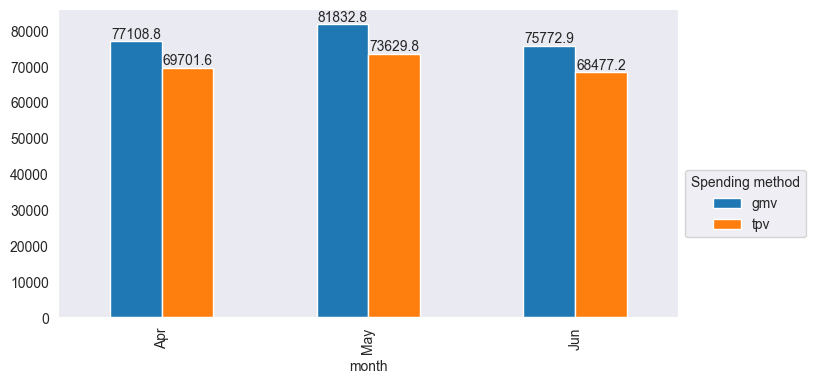

In [26]:
c1 = active_customer['GU subscription month'].notnull() # Boolean of customers who have GU subscription
c2 = active_customer[c1]['passenger_id'].unique() # Get unique IDs of active GU customers
c3 = df_m['passenger_id'].isin(c2) # mapping to data df_m to df_a -> Boolean Series of spending behavior of active GU customers
ax = df_m[c3].groupby('month')[['gmv', 'tpv']].sum().reindex(['Apr', 'May', 'Jun']).plot(kind='bar', figsize=(8, 4))

for container in ax.containers : 
    ax.bar_label(container)
    
plt.legend(title='Spending method', bbox_to_anchor=(1.0, 0.5))

Almost entire of active GU customers transactions are spent by cashless.

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

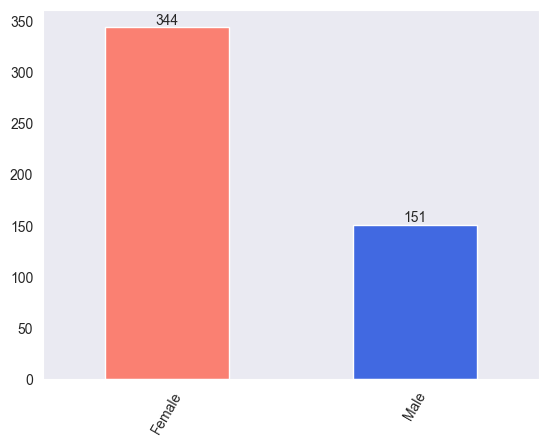

In [27]:
GU_condition = df_a['GU subscription month'].notnull()
GU_user = df_a[GU_condition]
ax = GU_user['predicted gender'].value_counts().plot(kind='bar', color=['salmon', 'royalblue'])

ax.bar_label(ax.containers[0])
plt.xticks(rotation=60)

Earlier, There's female customer, and male customer on Grab App ratio around 1.65, but for GU subscriber is more than 2.2. Implying that female customers significantly coresponded to Promotion, Discount, etc. (GrabUnlimited Provides subscribers more package promotions, discounts, and priviledges)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'platinum'),
  Text(1, 0, 'gold'),
  Text(2, 0, 'silver'),
  Text(3, 0, 'member')])

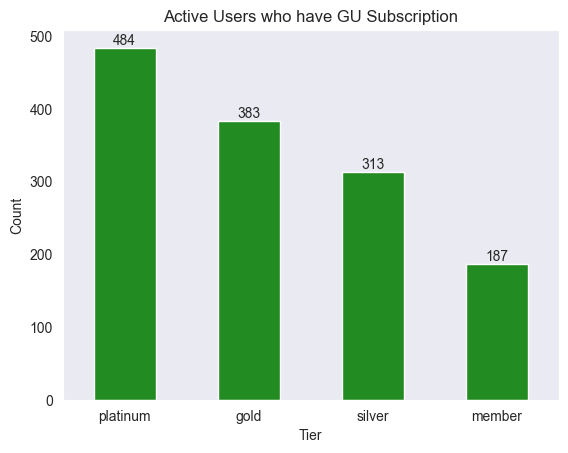

In [28]:
# Number of active customer who has Unlimited Subscription
gu_customer_condition = active_customer['GU subscription month'].notnull()
active_gu_customer = active_customer[gu_customer_condition]
active_gu_customer_id = np.array(active_gu_customer['passenger_id'])
ax = df_m[df_m['passenger_id'].isin(active_gu_customer_id)]['eom_reward_tier'].value_counts().plot(kind='bar', color='forestgreen')

ax.bar_label(ax.containers[0])
plt.title('Active Users who have GU Subscription')
plt.xlabel('Tier')
plt.ylabel('Count')
plt.xticks(rotation='horizontal')

There's several ways to interpret from this chart, but eventually, the result is customers who used GU subscription are likely to be more loyal to Grab and stay active.

Text(0.5, 1.0, 'Users Having GrabUnlimited Subscription')

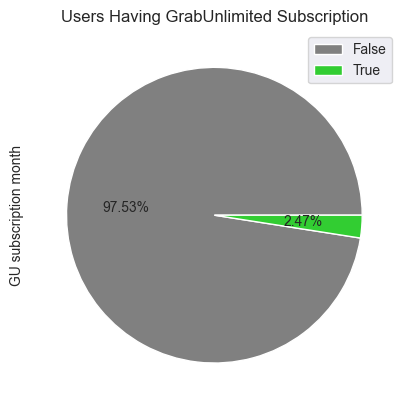

In [29]:
df_a['GU subscription month'].notnull().value_counts().plot(kind='pie', autopct='%.2f%%', labels=None, legend=True, colors=['gray', 'limegreen'])
plt.title('Users Having GrabUnlimited Subscription')

You can see that customer who applied GU subscription are exceptionally loyal to Grab, but still, very few users on Grab App applied GU subscription. This should be more taken seriously to make Grab customer be more loyal to Grab.

---

**Comparing number of users between cities**

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'H')])

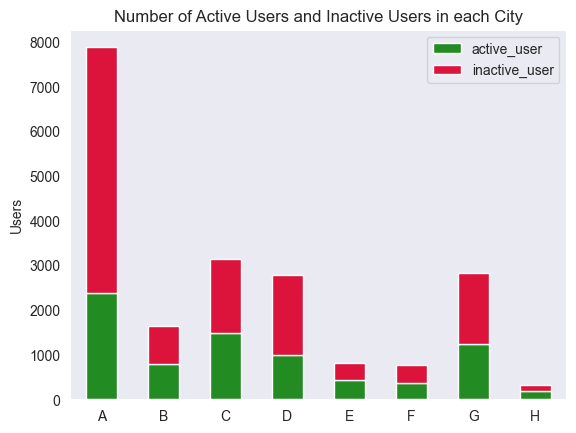

In [30]:
# ax1 = inactive_customer['city'].value_counts().reindex(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']).plot(kind='bar', color='darkred', alpha=0.7)
ax1 = active_customer['city'].value_counts().reindex(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']).tolist()
# ax2 = active_customer['city'].value_counts().reindex(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']).plot(kind='bar', color='forestgreen', bottom=ax1)
ax2 = inactive_customer['city'].value_counts().reindex(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']).tolist()
df_temp = pd.DataFrame({'active_user': ax1, 'inactive_user': ax2}, index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])

df_temp.plot(kind='bar', stacked=True, color={'active_user': 'forestgreen', 'inactive_user': 'crimson'})
plt.title('Number of Active Users and Inactive Users in each City')
plt.ylabel('Users')
plt.xticks(rotation='horizontal')

Number of inactive users show opportunity for Grab to capture. And number of active users is like points of Grab that have to be maintain.

---

**IOS VS Android**

(array([0, 1]), [Text(0, 0, 'Android'), Text(1, 0, 'iOS')])

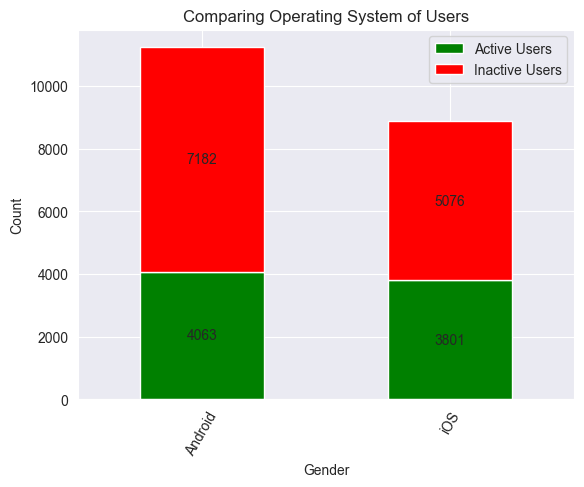

In [31]:
x = df_a['operating_system'].value_counts().index.tolist()
y1 = active_customer['operating_system'].value_counts().values.tolist()
y2 = inactive_customer['operating_system'].value_counts().values.tolist()

df_temp = pd.DataFrame(data={'Active Users': y1, 'Inactive Users': y2})
df_temp.index = x

ax = df_temp.plot(kind='bar', stacked=True, xlabel='Gender', ylabel='Count', color={'Active Users': 'green','Inactive Users': 'red'})
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

# https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels

plt.grid(True)
plt.title('Comparing Operating System of Users')
plt.xticks(rotation=60)

In [32]:
user_android = df_a.loc[df_a['operating_system'] == 'Android']
user_ios = df_a.loc[df_a['operating_system'] == 'iOS']

df_a_operating_system_android = df_m[df_m['passenger_id'].isin(user_android['passenger_id'])]
df_a_operating_system_ios = df_m[df_m['passenger_id'].isin(user_ios['passenger_id'])]

print('average Android users spending: ', df_a_operating_system_android['gmv'].mean().round(3))
print('average IOS users spending: ', df_a_operating_system_ios['gmv'].mean().round(3))

average Android users spending:  55.727
average IOS users spending:  75.215


According to the chart, there's more Android users than IOS users, but somehow, both group have approximately equal active rate, and also IOS users averagely spent more than Android users. This gives you some insights, but not utilizable for creating strategy.

---

**Comparing spending amount between services**

C:\Users\HP\AppData\Local\Temp\ipykernel_38384\364859723.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sample = df_m.groupby('month').sum()


(array([0, 1, 2]), [Text(0, 0, 'Apr'), Text(1, 0, 'Jun'), Text(2, 0, 'May')])

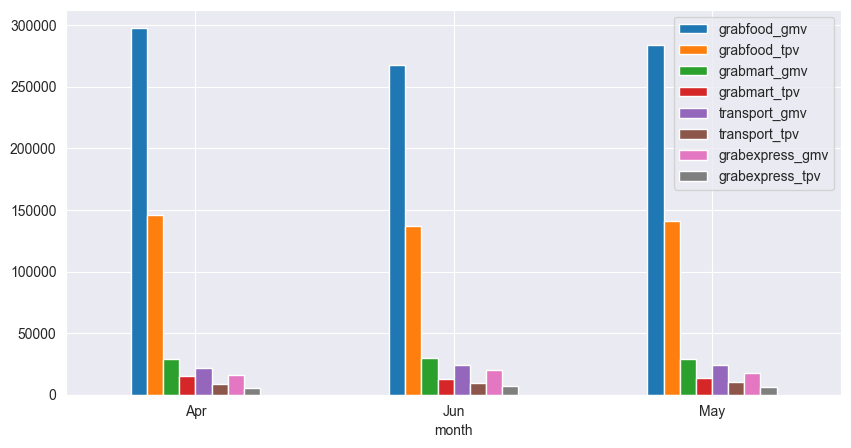

In [33]:
df_sample = df_m.groupby('month').sum()
df_sample = df_sample[['grabfood_gmv', 'grabfood_tpv', 'grabmart_gmv', 'grabmart_tpv', 'transport_gmv', 'transport_tpv', 'grabexpress_gmv', 'grabexpress_tpv']]

ax = df_sample.plot(kind='bar', legend='best', figsize=(10, 5))
plt.grid(True)
plt.xticks(rotation='horizontal')

In [34]:
df_sample[['grabmart_gmv', 'transport_gmv']].mean()

grabmart_gmv     29277.630000
transport_gmv    23229.253333
dtype: float64

From earlier, you can see that most of customers choose GrabFood or GrabTransport as a first service, but somehow, GrabMart is able to make more value than GrabTransport. It imply that GrabTransport seems to have some trouble, so after first-time purchase, people decide to quit or give a lesser attention to GrabTransport.

---

**Spending behavior of customers over Q2 2022**

(array([0, 1, 2]), [Text(0, 0, 'Apr'), Text(1, 0, 'May'), Text(2, 0, 'Jun')])

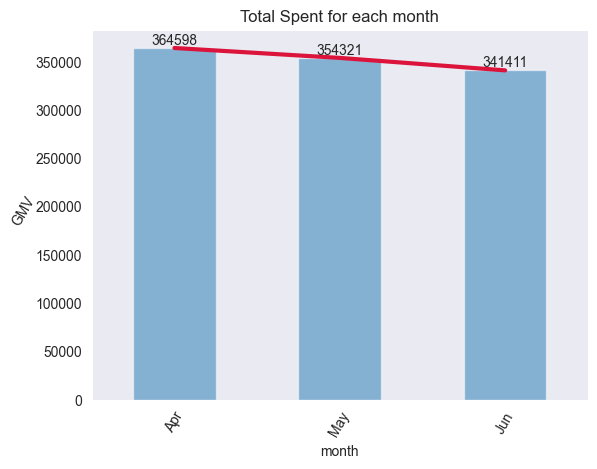

In [35]:
ax = df_m.groupby('month')['gmv'].sum().reindex(['Apr', 'May', 'Jun']).plot(kind='bar', alpha=0.5)
df_m.groupby('month')['gmv'].sum().reindex(['Apr', 'May', 'Jun']).plot(color='crimson', linewidth=3)

ax.bar_label(ax.containers[0])
plt.title('Total Spent for each month')
plt.ylabel('GMV', rotation=60)
plt.xticks(rotation=60)

Text(0.5, 1.0, 'Number of Users Using Grab each Month')

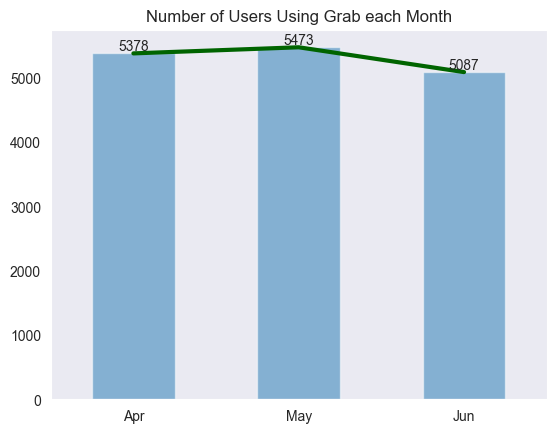

In [36]:
ax = df_m['month'].value_counts().reindex(['Apr', 'May', 'Jun']).plot(kind='bar', alpha = 0.5)
df_m['month'].value_counts().reindex(['Apr', 'May', 'Jun']).plot(color='darkgreen', linewidth=3)

ax.bar_label(ax.containers[0])
plt.title('Number of Users Using Grab each Month')

From above, although customers active rate seem to be unstable, but actually, overall Users' spending have decreased gradually as a downward trend. It means customers' ticket size is smaller than before (Ticket size is amount of sales per user for each transaction).

---

For a data which has multiple columns, Correlation Heatmap helps you to find pairwise correlation of all columns, easier to inspect which columns should be taken or compared seriously.

C:\Users\HP\AppData\Local\Temp\ipykernel_38384\2760447228.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_m.corr(method='pearson')


<AxesSubplot:>

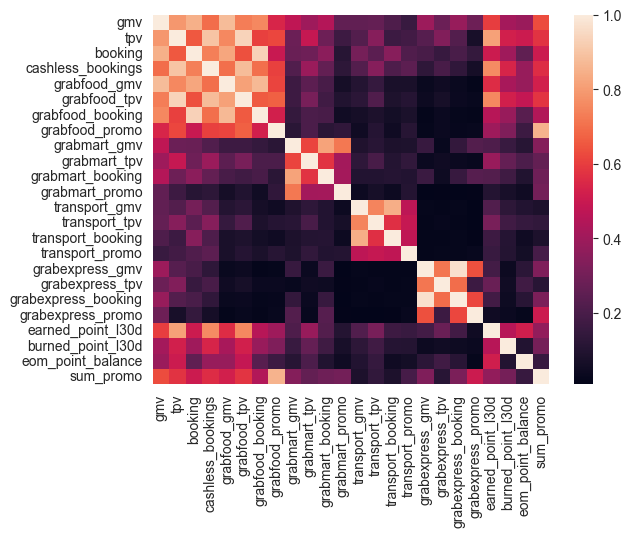

In [37]:
corr = df_m.corr(method='pearson')
sns.heatmap(data=corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

**Pearson method for linear correlation.**

C:\Users\HP\AppData\Local\Temp\ipykernel_38384\659463242.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_m.corr(method='kendall')


<AxesSubplot:>

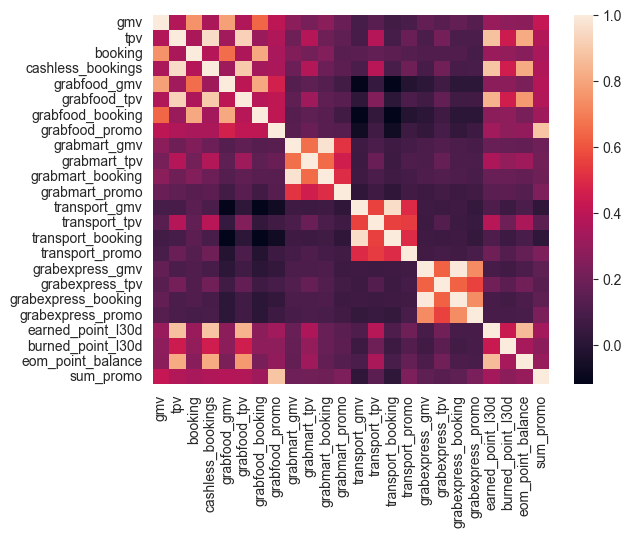

In [38]:
corr = df_m.corr(method='kendall')
sns.heatmap(data=corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

**Kendall method for Non-linear correlation.**

You can assume multiple things from these 2 heatmap. But for my assumptions, there're 3 insights that I want to emphasize.

* Customers usually not pay for GrabFood by cashless method, but in cash instead.
* The more cashless customers pay, the more points they earn.
* Even they earned so many points, customers don't quite used or burned points that they earned.

> From [GrabRewards Information](https://www.grab.com/th/en/rewards/); Customers will earn 1 point for every 16 THB spent via GrabPay (cashless method). And with right amount of points for every half year, customers have a opportunity to upgrade their tier. But point validity period is 3 months, so if customers need to extend their points validity period, they have to earn just 1 point or more to keep their point alive. And the higher tier they are, the more points they earn with every 16 THB.<br>

> For the point usage, they can exchange their point to be discounts (220 pts = 10 THB, 440 pts = 20 THB, 1,100 pts = 50 THB).

> Moreover, The higher tier they are, the more rewards, and exclusive priviledges they get.

By this information and insights, it give a lot more sense for us to see the problems of customers using Grab. We will discuss about business strategy, and approaches in the next section of this notebook.

---

**Ticket Size**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'member'),
  Text(1, 0, 'silver'),
  Text(2, 0, 'gold'),
  Text(3, 0, 'platinum')])

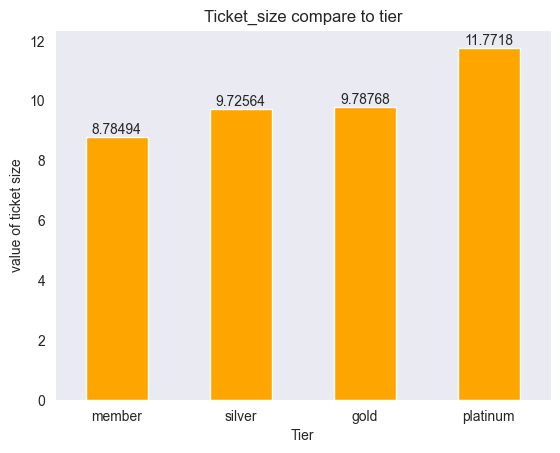

In [39]:
# there're some transactions containing 0 booking, 0 spending, but existing in df_m table, so you have to remove it for avoiding divided by 0 error.
error_index = df_m.loc[df_m['booking'] == 0].index
error = df_m.index.isin(error_index)

# create a new additional column 'ticker_size' for each transaction
df_m['ticket_size'] = df_m['gmv'] / df_m['booking']
ticket_size_mean = df_m[~error].groupby('eom_reward_tier')['ticket_size'].mean()

ax = ticket_size_mean.reindex(['member', 'silver', 'gold', 'platinum']).plot(kind='bar', color='orange')
ax.bar_label(ax.containers[0])
plt.title('Ticket_size compare to tier')
plt.xlabel('Tier')
plt.ylabel('value of ticket size')
plt.xticks(rotation='horizontal')

Text(0.5, 0, 'Number of Booking')

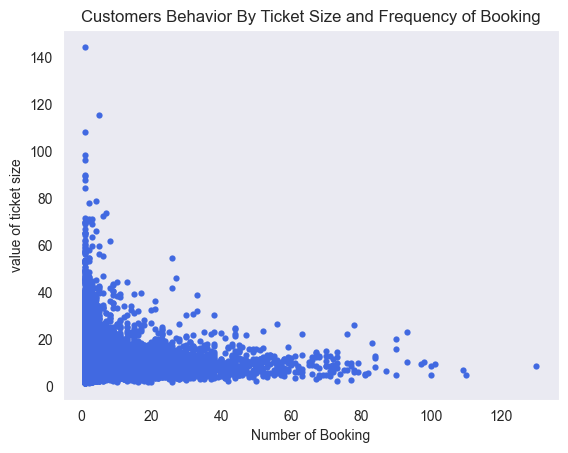

In [40]:
df_m[~error].plot(kind='scatter', x='booking', y='ticket_size', linewidth=0.01, color='royalblue')
plt.title('Customers Behavior By Ticket Size and Frequency of Booking')
plt.ylabel('value of ticket size')
plt.xlabel('Number of Booking')

From bar chart above, you can see that the higher tier, the harder they spent per transaction.

From above scatter plot, you can slightly see pattern of customer behavior. The first group, they pay hard per transaction, but not frequently. The second group, They use Grab frequently, but quite small amount of value per transaction.

---

**Analysis by Tier**

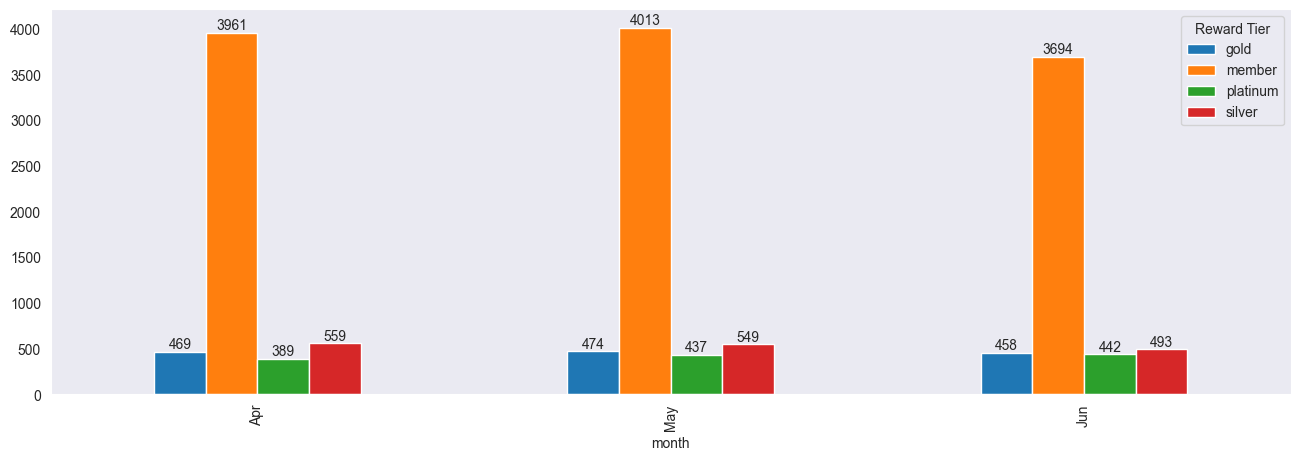

In [41]:
ax = df_m.groupby('month')['eom_reward_tier'].value_counts().unstack().reindex(['Apr', 'May', 'Jun']).plot(kind='bar', figsize=(16,5))

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels)

# https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels

plt.legend(title='Reward Tier')

Most people are in 'Member' tier which is the lowest tier.

[Text(0, 0, '42.3079'),
 Text(0, 0, '59.8939'),
 Text(0, 0, '102.565'),
 Text(0, 0, '257.964')]

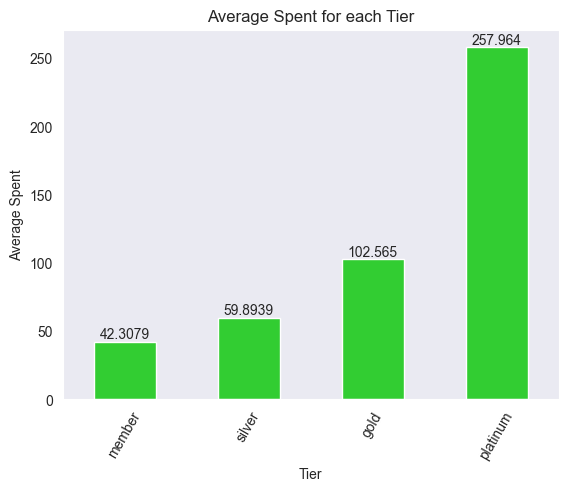

In [42]:
ax = df_m.groupby('eom_reward_tier')['gmv'].mean().sort_values().plot(kind='bar', color='limegreen')

plt.xticks(rotation=60)
plt.xlabel('Tier')
plt.ylabel('Average Spent')
plt.title('Average Spent for each Tier')
ax.bar_label(ax.containers[0])

[Text(0, 0, '3.39761'),
 Text(0, 0, '7.99528'),
 Text(0, 0, '15.2003'),
 Text(0, 0, '37.0974')]

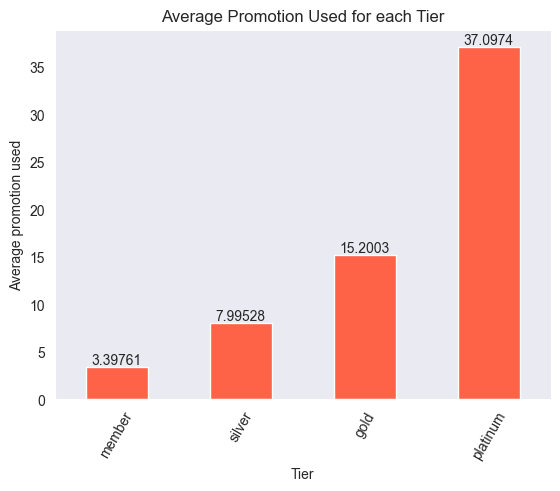

In [43]:
ax = df_m.groupby('eom_reward_tier')['sum_promo'].mean().sort_values().plot(kind='bar', color='tomato')

plt.xticks(rotation=60)
plt.xlabel('Tier')
plt.ylabel('Average promotion used')
plt.title('Average Promotion Used for each Tier')

ax.bar_label(ax.containers[0])

In [44]:
member = df_m.loc[df_m['eom_reward_tier'] == 'member']
silver = df_m.loc[df_m['eom_reward_tier'] == 'silver']
gold = df_m.loc[df_m['eom_reward_tier'] == 'gold']
platinum = df_m.loc[df_m['eom_reward_tier'] == 'platinum']

print('Average Promotion used of Member Tier: ', round(member['sum_promo'].mean()/member['gmv'].mean(), 4)*100, '%')
print('Average Promotion used of Silver Tier: ', round(silver['sum_promo'].mean()/silver['gmv'].mean(), 3)*100, '%')
print('Average Promotion used of Gold Tier: ', round(gold['sum_promo'].mean()/gold['gmv'].mean(), 4)*100, '%')
print('Average Promotion used of Platinum Tier: ', round(platinum['sum_promo'].mean()/platinum['gmv'].mean(), 4)*100, '%')

Average Promotion used of Member Tier:  8.03 %
Average Promotion used of Silver Tier:  13.3 %
Average Promotion used of Gold Tier:  14.82 %
Average Promotion used of Platinum Tier:  14.38 %


The higher tier, the higher promotion or discount customers used compare to their spent. It's because Grab provided more rewards and priviledges for the higher tier. But here's the thing, for Grab, the more promotions used, the less profit Grab earn, but in return, Grab obtain loyalty of customer making Customer Lifetime Value increasing.

---

**Cash and Cashless**

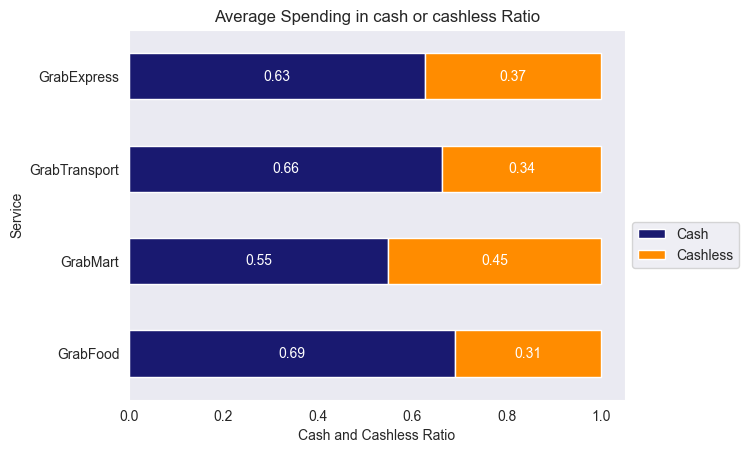

In [45]:
df_temp = df_m

df_temp['grabfood_cashless_ratio'] = df_m['grabfood_tpv'] / df_m['grabfood_gmv']
df_temp['grabfood_cash_ratio'] = 1 - df_temp['grabfood_cashless_ratio']

df_temp['grabmart_cashless_ratio'] = df_m['grabmart_tpv'] / df_m['grabmart_gmv']
df_temp['grabmart_cash_ratio'] = 1 - df_temp['grabmart_cashless_ratio']

df_temp['transport_cashless_ratio'] = df_m['transport_tpv'] / df_m['transport_gmv']
df_temp['transport_cash_ratio'] = 1 - df_temp['transport_cashless_ratio']

df_temp['grabexpress_cashless_ratio'] = df_m['grabexpress_tpv'] / df_m['grabexpress_gmv']
df_temp['grabexpress_cash_ratio'] = 1 - df_temp['grabexpress_cashless_ratio']

# df_temp.mean().round(3)
x = ['GrabFood', 'GrabMart', 'GrabTransport', 'GrabExpress']
cashless = df_temp[['grabfood_cashless_ratio',
                    'grabmart_cashless_ratio',
                    'transport_cashless_ratio',
                    'grabexpress_cashless_ratio']].mean().tolist()
cash = df_temp[['grabfood_cash_ratio',
                'grabmart_cash_ratio',
                'transport_cash_ratio',
                'grabexpress_cash_ratio']].mean().tolist()

df_temp_new = pd.DataFrame({'Cash': cash , 'Cashless': cashless}, index=x)
ax = df_temp_new.plot(kind='barh', stacked=True, color={'Cash': 'midnightblue', 'Cashless': 'darkorange'})
plt.title('Average Spending in cash or cashless Ratio')
plt.xlabel('Cash and Cashless Ratio')
plt.ylabel('Service')
plt.legend(bbox_to_anchor=(1.0, 0.5))

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [round(v.get_width(), 2) if v.get_width() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', color = 'white')


[Text(0, 0, '8.9886'), Text(0, 0, '9.76789')]

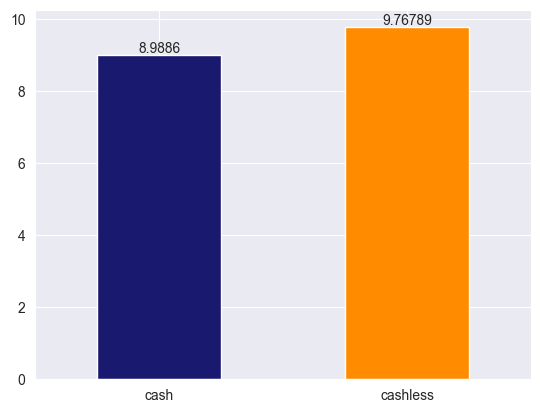

In [99]:
# cashless ticket size
ticket_size_cashless = df_m['tpv'].divide(df_m['cashless_bookings']).replace(np.inf, np.nan)
# cash ticket size
ticket_size_cash = (df_m['gmv']-df_m['tpv']).divide(df_m['booking']-df_m['cashless_bookings']).replace(np.inf, np.nan)

ax = pd.DataFrame({'cashless': ticket_size_cashless.to_numpy(), 'cash': ticket_size_cash.to_numpy()}).mean().sort_values(ascending=True).plot(kind='bar', 
                                                                                                                                              color=['midnightblue', 'darkorange'])
plt.grid(True)
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0])

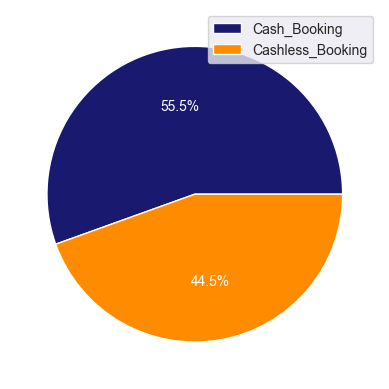

In [46]:
cashless_booking = df_m['cashless_bookings'].sum()
cash_booking = df_m['booking'].sum() - cashless_booking
data = [cash_booking, cashless_booking]
labels = ['Cash_Booking', 'Cashless_Booking']

fig, ax = plt.subplots()
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=['midnightblue', 'darkorange'], textprops={'color': 'w'})
plt.legend()

From stacked bar chart, it's a ratio calculated by average amount of spending per user. It means like, one person is likely to pay for GrabFood in cash 69%, and in cashless 31%, and so on. As you can see, customers quite more like to pay in cash, even they can earn points, benefits, and a chance to upgrade their tier just by paying in cashless in the same amount.

From pie chart, It shows comparison of cash booking, and cashless booking. the result is both methods have number of bookings quite equal.

---

### Insights Summary and Interpretation

There's quite a lot of insights from data analysis, so this section is made for summarizing insights which can be utilized for business and marketing use cases.<br>

**But, first thing that should be reminded is that Cashless spending (TPV) provides points to customers causing a chance to upgrade their tier, and then they can earn more benefits, like promotion, discounts, exclusive priviledges.**

So, I will list issues that should be mentioned and taken care of.

1. Customers' active rate is only around 39%. **It means customers are not loyal enough to Grab, even they have a potential to purchase**, making Grab still being unstable startup company.

2. Majority of Grab customers are female (Female:Male = 1.654). Moreover, female customers were likely to be more loyal customer due to active rate comparing to male customers active rate.

3. Female customers quite attracted to promotions, discounts, subscription, and exclusive priviledge more than male customers.

4. There's a lot of customers who used GrabTransport as a first service, and then being inactive. Moreover the customers averagely spent on GrabFood even more than customers who used Grabfood as a first service, and also mostly spent in cashless (TPV) implying that GrabTransport first-used customers are highly needed to be captured by Grab for increasing income and loyal customers.

5. Customers who used GrabTransport as a first service were likely to live in city A.

6. City A literally has a larger marketshare, and customers in the city have more potential to make more income for every Grab services comparing to other cities.

7. **Customers who bought GrabUnlimited (GU) subscription are definitely to stay active, and be loyal to Grab (considered by TPV spent). But GU subscription got lesser and lesser attention overtime.**

8. GU customers were likely to be in high tier, and **only 2.47% of all customers are subscribed to GrabUnlimited campaign**.

9. There's a lot of customers who used GrabFood and GrabTransport as a first service comparing to the other 2 services, but eventually, GrabMart returned more value to Grab than GrabTransport did. It imply that GrabTransport seems to have some troubles, so customers decided to quit.

10. From 2 heatmaps, Customers usually pay for GrabFood in cash. Customers didn't to use their point as much as they earned **implying that customers didn't see importances of points, but they literally liked promotions and discounts.**

11. The higher tier for customers, the harder they spent per transaction.

12. **Grab earned lesser profit as customers use more promotions in higher tier.** And a lot of customers still remained in Member tier which not leading to any loyalty.

13. **Somehow, customers were likely to spend *more amount* in cash more than they did in cashless, but number of booking for cash and cashless are approximately equal.**  

### Actions for Business and Marketing use cases

After knowing insights and issues, it's time to create and select approaches to make an impact from the data.

**Purpose of this strategy is to make customers be more loyal to Grab, re-visit and re-purchase, and stay active.**

1. The first issue is cash and cashless spending. As mentioned above, even customers could earn points by paying in cashless in the same amount of paying in cash, then upgrade tier to acquire benefits, but still, customer pay in cash. So, **what Grab should do is to encourage customers to pay in cashless to make them easier to climb up their tier without baiting them by promotions, discount, or reducing value of point** (16THB / point) to avoid loss of profit, but instead, showing them that they could earn more benefits if they are in the higher tier, and emphasizing that cashless payment can help them climbing up. As the result, customers would be in higher tier, be more loyal, and stick to Grab App.

2. **Keep providing them promotions, discounts, and exclusive priviledges in higher tier, but not more than before.** Although the higher tier of customer, the more promotions used leading to the more Grab's profit loss, but with this strategy, Grab will earn customer's loyalty in long-term, and increase Customer Lifetime Value making Grab an unbeatable startup company. And also, Grab could subtly reduce promotions, and discounts provided to customer in Member tier, and advertise louder the more benefits customers could get by spending in cashless and by staying in higher tier to avoid being noticed of increasing the Grab's own profit.

3. **Put an effort to make people purchase a subscription.** Due to 98.19% of GU subscribers are staying active, so I believe that subscription is a crucial factor to active rate. But as mentioned before, GrabUnlimited is getting lesser and lesser attention overtime. So, the solution is to better inform what benefits, promotion, and discounts they could get. Or maybe initiate a new campaign that can replace to GrabUnlimited to get a high attention again. And if you carefully analyze GrabUnlimited benefits, you will see that GrabUnlimited overly provide customers promotions that not suit to customer behavior leading to neglecting of customers who think GrabUnlimited giving promotions more than they need, and not worth to purchase. This is another approach which will not be detailed, because information about GrabUnlimited besides the given datasets is required.

4. **Try to attract or convince inactive users who used GrabTransport as a first vertical service to back active again by improving GrabTransport campaign, and promotions**, because we know that this group of customers were likely to focus on transport service more than they did on the others, so providing them GrabTransport promotions would make the most impact. With the result, Grab will earn a better profit from all services, because this group of customers have a willing to use other services, especially GrabFood besides GrabTransport. And Grab would be able to capture a better marketshare in potential city, like city A.

### KPIs

Coresponding to above strategies,

1. Rate of customers in higher tier is getting higher after advertisement of encourageing cashless payment.

2. Rate of using promotion per user in higher tier (Silver, Gold, and Platinum) is stable, but totally higher.

3. Rate of subscribers comparing to overall customers is higher.

4. Inactive users come back active to re-purchase GrabTransport again, and overall income from every services is better.

---

### Epilogue

Hopefully think this notebook would be useful for reader. Thank you for reading. and Thanks to Grab TH company for useful and practical datasets for learning and practices.